# Speed Visualization
> 使用 [Julia](https://julialang.org/) 进行可视化

由于是 `mxn` 和 `nxp` 维矩阵之间的乘法。因此我们固定三个变量 `n`, `m`, `p` 中的两个，使其固定为 `500`，然后调整另外一个变量。变化范围为 `1:10:801`，然后我们记录每次运行的时间。
- `dfm` 表示固定 `n`, `p` 调整 `m` 的结果。
- `dfn` 表示固定 `m`, `p` 调整 `n` 的结果。
- `dfp` 表示固定 `n`, `m` 调整 `p` 的结果。

In [1]:
using CairoMakie, CSV, DataFrames

In [2]:
dfm = CSV.read("change_m.csv", DataFrame);
dfn = CSV.read("change_n.csv", DataFrame);
dfp = CSV.read("change_p.csv", DataFrame);

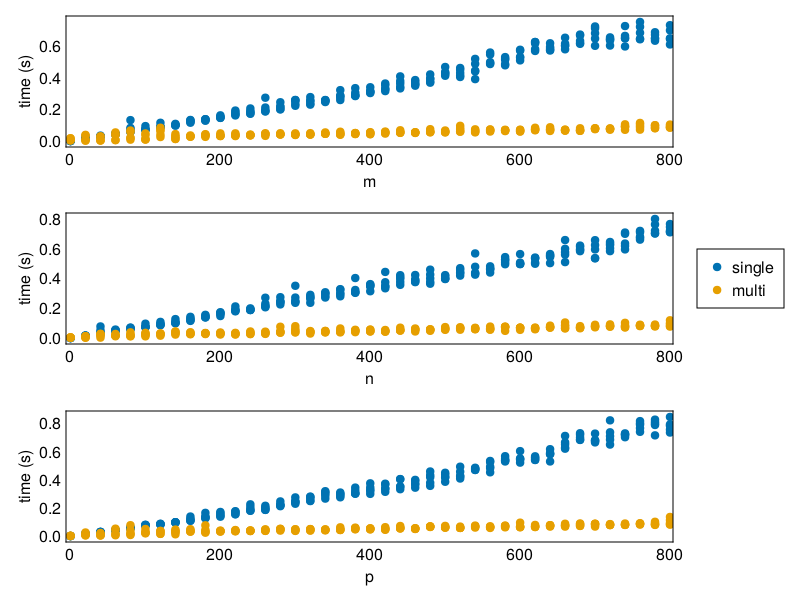

In [22]:
fig = Figure();
ax1 = Axis(
    fig[1, 1],
    xlabel = "m",
    ylabel = "time (s)",
    );
ax2 = Axis(
    fig[2, 1],
    xlabel = "n",
    ylabel = "time (s)",
    );

ax3 = Axis(
    fig[3, 1],
    xlabel = "p",
    ylabel = "time (s)",
    );

s1 = scatter!(ax1,dfm[:,:m],dfm[:,:single]);
s2 = scatter!(ax1,dfm[:,:m],dfm[:,:multi]);
scatter!(ax2,dfn[:,:n],dfn[:,:single]);
scatter!(ax2,dfn[:,:n],dfn[:,:multi]);
scatter!(ax3,dfp[:,:p],dfp[:,:single]);
scatter!(ax3,dfp[:,:p],dfp[:,:multi]);
xlims!.([ax1,ax2,ax3],-5,805)
hidedecorations!.([ax1,ax2,ax3], ticklabels=false, label=false)
Legend(fig[:,2], [s1,s2], ["single", "multi"])
fig

In [24]:
save("change.svg", fig)

CairoMakie.Screen{SVG}
